### Projeto - Análise e predição de desempenho de alunos para seu próximo emprego.

In [1]:
# Datas e Horas
from datetime import datetime

# Manipulação de Dados
import numpy as np
import pandas as pd

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-Processamento
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Processamento ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Avaliação de Desempenho
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
# Lendo dataset
campus = pd.read_csv('campus.csv')

# Primeiras linhas
campus.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
# Descrição
campus.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [4]:
# Avaliando dataset
campus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
#Dimensão do Dataset
campus.shape

(215, 15)

In [6]:
#Verificando valores Nulos
campus.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
# Checando as colunas
campus.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [8]:
# Renomeando Colunas
campus.rename(
    columns={
        'sl_no' : 'serial', 
        'gender' : 'gênero', 
        'ssc_p' : 'ens_medio_p',
        'ssc_b' : 'conselho_em', 
        'hsc_p' : 'ens_tecnico_p', 
        'hsc_b' : 'conselho_et', 
        'hsc_s' : 'ens_medio_esp',
       'degree_p' : 'grau_p', 
       'degree_t' : 'grau_tipo', 
       'workex' : 'exp_trabalho', 
       'etest_p' : 'teste_emprego_p', 
       'specialisation' : 'especializacao', 
       'mba_p' : 'mba_p',
       'status' : 'status', 
       'salary' : 'salario'
    }, inplace=True
)

In [9]:
# Verificando alterações
campus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   serial           215 non-null    int64  
 1   gênero           215 non-null    object 
 2   ens_medio_p      215 non-null    float64
 3   conselho_em      215 non-null    object 
 4   ens_tecnico_p    215 non-null    float64
 5   conselho_et      215 non-null    object 
 6   ens_medio_esp    215 non-null    object 
 7   grau_p           215 non-null    float64
 8   grau_tipo        215 non-null    object 
 9   exp_trabalho     215 non-null    object 
 10  teste_emprego_p  215 non-null    float64
 11  especializacao   215 non-null    object 
 12  mba_p            215 non-null    float64
 13  status           215 non-null    object 
 14  salario          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [10]:
campus.describe().T

,count,mean,std,min,25%,50%,75%,max
serial,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ens_medio_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
ens_tecnico_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
grau_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
teste_emprego_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salario,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [11]:
# Realizando a substituição de valores
campus['salario'].fillna(value=campus['salario'].median(), inplace=True)

##### Devido a quantidade de valores missing, os mesmos serão substituídos pela média..

In [12]:
# Removendo coluna Serial
campus = campus.drop(['serial'], axis=1)


In [19]:
campus.head()

,gênero,ens_medio_p,conselho_em,ens_tecnico_p,conselho_et,ens_medio_esp,grau_p,grau_tipo,exp_trabalho,teste_emprego_p,especializacao,mba_p,status,salario
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Análise Exploratória de Dados


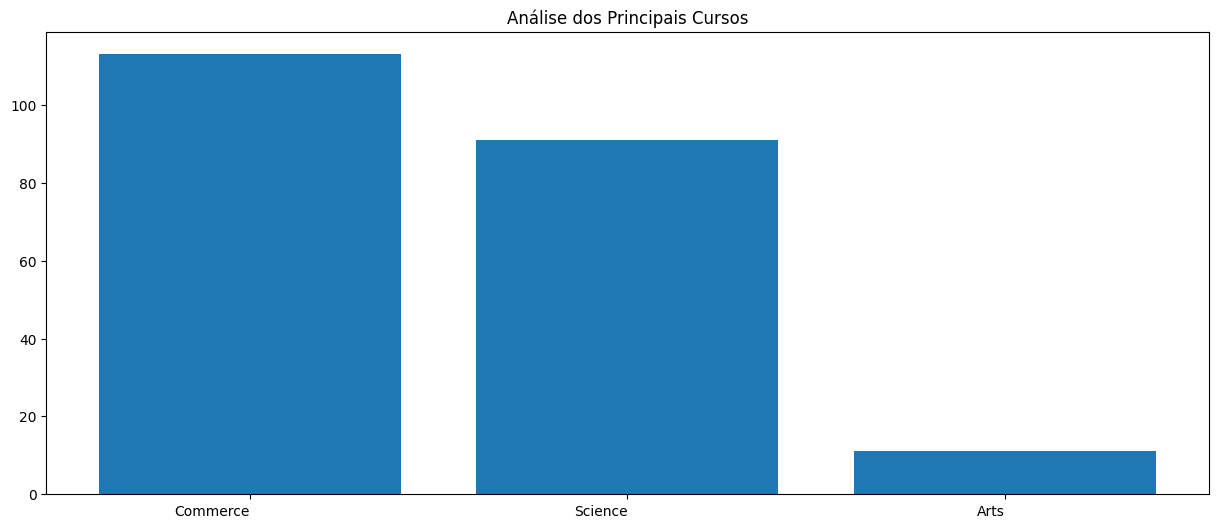

In [26]:
# Gráficos de Análise dos Setores
plt.figure(figsize=(15,6))
plt.title('Análise dos Principais Cursos')
plt.bar(campus['ens_medio_esp'].value_counts().index, campus['ens_medio_esp'].value_counts());
plt.xticks(ha='right');

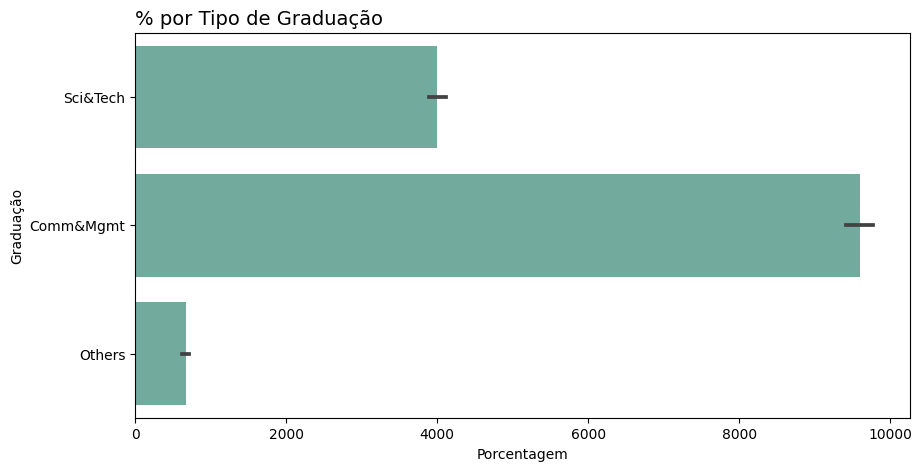

In [28]:
# Tamanho da imagem
plt.figure( figsize=(10, 5) )

# Titulo
plt.title('% por Tipo de Graduação', loc='left', fontsize=14 )

# Grafico
sns.barplot( data=campus, x='grau_p', y='grau_tipo',color='#69b3a2', estimator=sum )

# Label
plt.ylabel('Graduação');
plt.xlabel('Porcentagem');

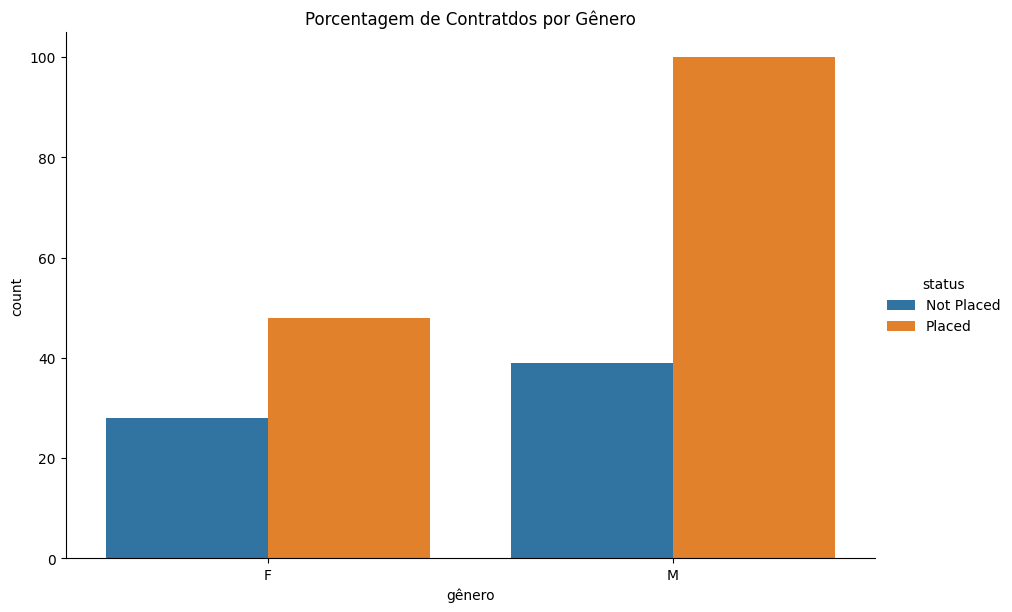

In [31]:
# Agrupe os dados por gênero e status e conte o número de ocorrências em cada grupo
dados_agrupados = campus.groupby(['gênero', 'status']).size().reset_index(name='count')

# Crie o gráfico de barras
sns.catplot(data=dados_agrupados, x='gênero', y='count', hue='status', kind='bar', palette=['#1f77b4', '#ff7f0e'], 
            height=6, aspect=1.5)
plt.title('Porcentagem de Contratdos por Gênero')
plt.show()

In [ ]:
# Cria um gráfico de dispersão usando a biblioteca Seaborn
sns.scatterplot(data=dados, x='ens_medio_p', y='salario', hue='status')

# Adiciona um título ao gráfico
plt.title('Relação entre ensino médio e salário')

# Exibe o gráfico na tela
plt.show()

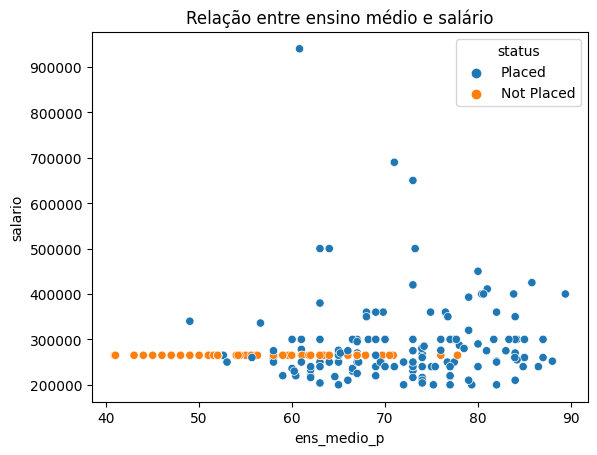

In [32]:
# Cria um gráfico de dispersão usando a biblioteca Seaborn
sns.scatterplot(data=campus, x='ens_medio_p', y='salario', hue='status')

# Adiciona um título ao gráfico
plt.title('Relação entre ensino médio e salário')

# Exibe o gráfico na tela
plt.show()

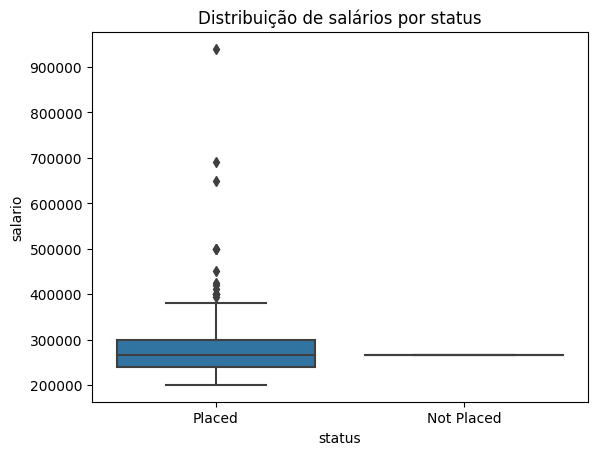

In [33]:
# Cria um boxplot usando a biblioteca Seaborn
sns.boxplot(data=campus, x='status', y='salario')

# Adiciona um título ao gráfico
plt.title('Distribuição de salários por status')

# Exibe o gráfico na tela
plt.show()

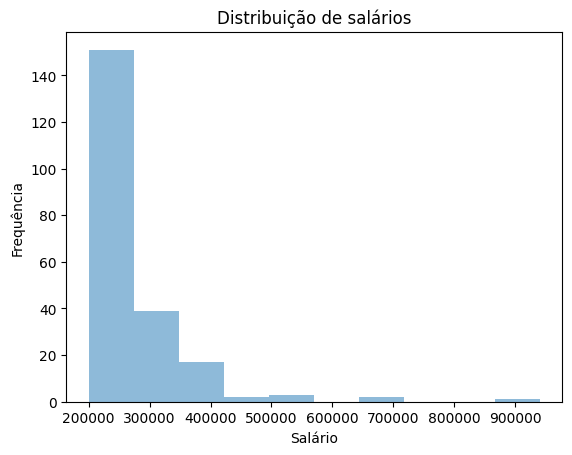

In [34]:
# Cria um histograma usando a biblioteca Matplotlib
plt.hist(campus['salario'], bins=10, alpha=0.5, color='#1f77b4')

# Adiciona um rótulo ao eixo x
plt.xlabel('Salário')

# Adiciona um rótulo ao eixo y
plt.ylabel('Frequência')

# Adiciona um título ao gráfico
plt.title('Distribuição de salários')

# Exibe o gráfico na tela
plt.show()